# Using pandas to study the stars

The Tycho-Gaia Astrometric Solution (TGAS) is a collection of 2.5 million stars identified by the Gaia astronomical observatory, a spacecraft launched in 2013. In this notebook, you will use the pandas library to analyze a fraction of that dataset.

First, import the pandas and matplotlib.pyplot libraries:

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

Now, open the "TGAS_data.csv" file using the pd.read_csv() function.

In [11]:
df = pd.read_csv('TGAS_data.csv')

Look at the first five rows of the dataframe using the .head() method.

In [12]:
df.head()

,TYC2 ID,Epoch,RA (deg),RA err (mas),Dec (deg),Dec err (mas),Parallax (mas),Parallax err (mas)
0,1-1001-1,2015,1.414659,0.483,2.448821,0.249,2.96,0.59
1,1-1009-1,2015,0.137272,0.453,0.721016,0.195,5.77,0.73
2,1-1016-1,2015,0.426679,0.456,1.786809,0.169,2.66,0.59
3,1-1021-1,2015,0.484126,0.388,0.434794,0.151,3.16,0.52
4,1-1024-1,2015,1.080285,0.347,0.875576,0.124,2.63,0.46


How many rows are there in this dataframe?

In [13]:
len(df)

# You can also use the pandas method df.count()

993037

You might notice that one of the columns contains the parallax angle for each star (remember: nearby objects have a larger parallax angle than far away objects).

Store the "parallax" column in a variable.

In [14]:
par = df["Parallax (mas)"]

Find the min, max, and mean parallax angle for this dataset:

In [15]:
print(par.min())
print(par.max())
print(par.mean())

-24.82
120.59
2.4250942311313683


Sort the entire dataframe by parallax angle from largest to smallest and print out the first 10 rows of the sorted dataframe.

In [16]:
# Remember to assign your sorted dataframe to a new variable
df_sorted = df.sort_values(["Parallax (mas)"], ascending = False)
df_sorted.head()

,TYC2 ID,Epoch,RA (deg),RA err (mas),Dec (deg),Dec err (mas),Parallax (mas),Parallax err (mas)
600536,3980-1081-1,2015,327.909017,0.768,59.294450,0.785,120.59,0.96
696461,4378-2162-2,2015,133.836686,0.381,70.792196,0.518,87.54,0.59
626905,4041-1365-1,2015,30.394817,0.228,63.769605,0.236,84.54,0.30
696460,4378-2162-1,2015,133.836474,0.597,70.793037,0.851,81.89,0.96
633075,4067-242-1,2015,58.293768,0.845,62.567786,0.341,81.24,0.47


## Selecting a particular value in a dataframe
You can index a single item from a row of the dataframe by specifying the column and then the row index as follows:

In [17]:
# This code will select the Parallax from the star in row ID 600536
df["Parallax (mas)"][600536] 

120.59

Try it yourself! Find the Parallax angle for the star in row index 1.

In [18]:
# Use the following format: df[column name/variable][row index]
df["Parallax (mas)"][1]

5.77

Now find the TYC2 ID for this star"

In [19]:
df["TYC2 ID"][1]

'1-1009-1    '

## Let's calculate the distance to these stars based on their parallax angle
The parallax angle in this database is measured in milliarcseconds (mas). Add a column called "Distance (par)" using the following formula to calculate distance in parsecs: 

distance (par) = 1 / (parallax/1000)

In [20]:
df["Distance (par)"] = 1/(par/1000)

Check your dataframe using the .head() method:

In [21]:
df.head()

,TYC2 ID,Epoch,RA (deg),RA err (mas),Dec (deg),Dec err (mas),Parallax (mas),Parallax err (mas),Distance (par)
0,1-1001-1,2015,1.414659,0.483,2.448821,0.249,2.96,0.59,337.837838
1,1-1009-1,2015,0.137272,0.453,0.721016,0.195,5.77,0.73,173.310225
2,1-1016-1,2015,0.426679,0.456,1.786809,0.169,2.66,0.59,375.939850
3,1-1021-1,2015,0.484126,0.388,0.434794,0.151,3.16,0.52,316.455696
4,1-1024-1,2015,1.080285,0.347,0.875576,0.124,2.63,0.46,380.228137


Find the min, max, and average distance:

In [22]:
dist = df["Distance (par)"]
print(dist.min())
print(dist.max())
print(dist.mean())

-99999.99999999999
99999.99999999999
747.2266340679466


Why are there negative distances? Can you find anything in the data that could explain this?

## Looking at the distribution of distances
The mean is helpful when it comes to learning about the average distance in parsecs to the stars we can measure with Gaia, but it doesn't give us the whole picture. Let's create a graph called a "histogram" that shows us how many stars have distances in each range.

There's a simple matplotlib.pyplot function for this called plt.hist()

The plt.hist() function takes three arguments: 
- The dataframe index (or variable) that you want to look at
- *optional* The number of ranges
- *optional* (x min, x max)

Don't forget plt.show() at the end!

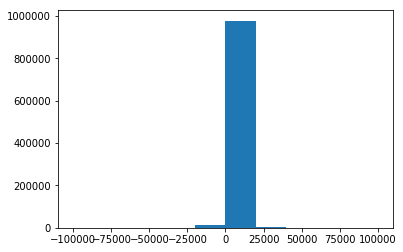

In [23]:
# First let's try the simplest version. Just use the dataframe index or variable for the distance column:
# Don't use the other two arguments for now:

plt.hist(dist)
plt.show()

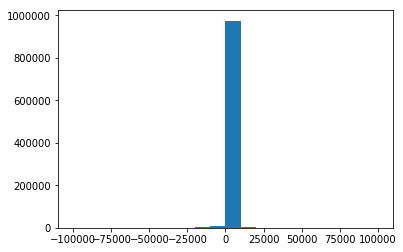

In [26]:
# We can split the data up into more ranges if we specify a number. Try adding 20 as the second argument:
plt.hist(dist, 20)
plt.show()

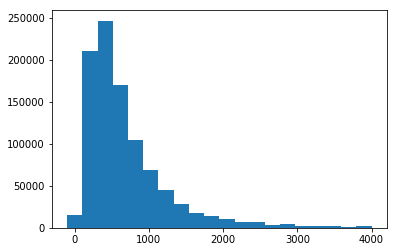

In [27]:
# There are so few stars in the very negative and very positive distances that it's skewing our results.
# Let's try specifying a min and max range of (-100, 4000)
plt.hist(dist, 20, (-100, 4000))
plt.show()